In [1]:
import numpy as np  
import pandas as pd  
from keras.utils import np_utils
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
import time
import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#原資料讀取
dirdata1='forehand_train_img/'
dirdata2='backhand_train_img/'
#資料增生讀取
dirdata3='0_data/'
dirdata4='1_data/'

In [3]:
def data_img(dirdata1,dirdata2):
    data = [] # 1 step
    label = []
    height=120
    BLACK = [0,0,0]
    for i in os.listdir(dirdata1): # 2 step
        img = cv2.imread(dirdata1+i)
        x,y,z = img.shape
        if x<=height:
            constant = cv2.copyMakeBorder(img,0,height-x,0,0,cv2.BORDER_CONSTANT,value=BLACK)
        data.append(constant) # 2-2 
        label.append(0) # 2-3
    for i in os.listdir(dirdata2):
        img = cv2.imread(dirdata2+i)
        x,y,z = img.shape
        if x<=height:
            constant = cv2.copyMakeBorder(img,0,height-x,0,0,cv2.BORDER_CONSTANT,value=BLACK)
        data.append(constant) # 2-2 
        label.append(1) # 2-3
        
    data = np.array(data) # 3
    label = np.array(label) #3

    label_one_hot = np.eye(2)[label] # 4 one-hot encoding

    data_norm = data / 255 #5
    return data_norm,label_one_hot

In [4]:
data, label=data_img(dirdata1,dirdata2)
#data1, label1=data_img(dirdata3,dirdata4)

In [5]:
#new_data=np.vstack((data,data1))
#new_label=np.vstack((label,label1))

In [6]:
#new_data.shape,new_label.shape

In [7]:
from sklearn.model_selection import train_test_split

X_train, Y_train, X_label, Y_label = train_test_split(data, label, test_size=0.5, random_state=42)

In [8]:
X_train.shape

(220, 120, 50, 3)

In [9]:
X_label.shape

(220, 2)

In [10]:
model = Sequential()  
model.add(Conv2D(filters=16,  kernel_size=(5,5),padding='same',
                 input_shape=(data.shape[1],data.shape[2],data.shape[3]),activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(BatchNormalization())
model.add(Conv2D(filters=36,  kernel_size=(5,5),padding='same',  activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 50, 16)       1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 25, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 60, 25, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 25, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 12, 36)       0         
 2D)                                                             
                                                        

In [12]:
# 定義訓練方式  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

start_time = time.time()
# 開始訓練  
train_history = model.fit(X_train,X_label,validation_split=0.3,epochs=100, batch_size=30, verbose=1)
end_time = time.time()

Epoch 1/100
6/6 [==============================] - 4s 53ms/step - loss: 4.0394 - accuracy: 0.5065 - val_loss: 0.6703 - val_accuracy: 0.7273
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.4899 - accuracy: 0.7532 - val_loss: 0.6523 - val_accuracy: 0.8030
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.3120 - accuracy: 0.8571 - val_loss: 0.6050 - val_accuracy: 0.9242
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0923 - accuracy: 0.9870 - val_loss: 0.5472 - val_accuracy: 0.9697
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 0.5095 - val_accuracy: 0.9848
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 0.5027 - val_accuracy: 0.6818
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.4521 - val_accuracy: 0.9091
Epoch 8/100
6/6 [=========

6/6 [==============================] - 0s 8ms/step - loss: 2.3687e-04 - accuracy: 1.0000 - val_loss: 0.0317 - val_accuracy: 1.0000
Epoch 59/100
6/6 [==============================] - 0s 9ms/step - loss: 5.5500e-04 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 60/100
6/6 [==============================] - 0s 9ms/step - loss: 5.0780e-04 - accuracy: 1.0000 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 61/100
6/6 [==============================] - 0s 9ms/step - loss: 1.2686e-04 - accuracy: 1.0000 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 62/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 63/100
6/6 [==============================] - 0s 9ms/step - loss: 1.6436e-04 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 64/100
6/6 [==============================] - 0s 9ms/step - loss: 8.1358e-04 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 65/

In [13]:
execution_time = (end_time - start_time)
print("執行時間: ",execution_time,"s")

執行時間:  9.497015237808228 s


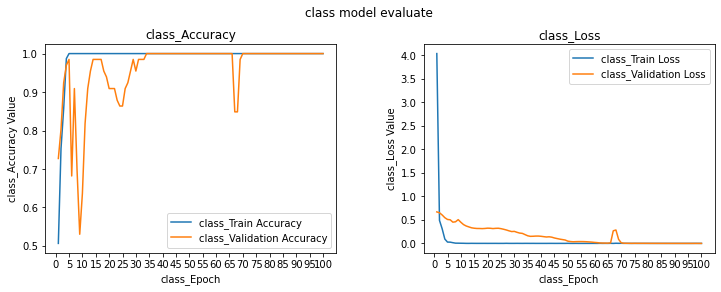

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('class model evaluate', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

class_epoch_list = list(range(1,101))
ax1.plot(class_epoch_list, train_history.history['accuracy'], label='class_Train Accuracy')
ax1.plot(class_epoch_list, train_history.history['val_accuracy'], label='class_Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('class_Accuracy Value')
ax1.set_xlabel('class_Epoch')
ax1.set_title('class_Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(class_epoch_list, train_history.history['loss'], label='class_Train Loss')
ax2.plot(class_epoch_list, train_history.history['val_loss'], label='class_Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('class_Loss Value')
ax2.set_xlabel('class_Epoch')
ax2.set_title('class_Loss')
l2 = ax2.legend(loc="best")

In [14]:
#model.save('2d_cnn.h5')

In [15]:
modello = keras.models.load_model('2d_cnn.h5')

In [16]:
test_dirdata1='forehand_test_img/'
test_dirdata2='backhand_test_img/'

In [17]:
test_data, test_label=data_img(test_dirdata1,test_dirdata2)

In [26]:
#time_pre=model.predict(Y_train,verbose=2)
time_pre=modello.predict(Y_train,verbose=2)

66/66 - 0s - 242ms/epoch - 4ms/step


In [27]:
Y_test = np.argmax(Y_label,axis=1)
Y_pred = np.argmax(time_pre,axis=1)

              precision    recall  f1-score   support

    forehand       0.97      0.86      0.91      1061
    backhand       0.87      0.97      0.92      1040

    accuracy                           0.92      2101
   macro avg       0.92      0.92      0.92      2101
weighted avg       0.92      0.92      0.92      2101



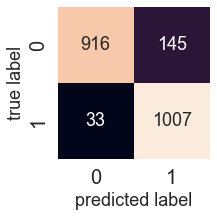

In [28]:
mat = confusion_matrix(Y_test,Y_pred)

sns.set(font_scale=1.5)
plt.subplot(1,2,1)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylabel('true label')
plt.xlabel('predicted label');

target_names = ["forehand","backhand"]
print(classification_report(Y_test,Y_pred,target_names=target_names))